# Logistic Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [24]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Preprocessing

In [6]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 891    │ │ string      │ 5     │ │ class                 │                                │
│ │ Number of columns │ 15     │ │ int32       │ 4     │ │ deck                  │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ └───────────────────────┘                                │
│                                │ category    │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50    ┃ p75  ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ survived       │     0 │       0 │   0.3838 │   0.4866 │     0 │       0 │      0 │    1 │      1 │ ▇    ▅ │  │
│ │ pclass         │     0 │       0 │    2.309 │   0.8361 │     1 │       2 │      3 │    3 │      3 │ ▃  ▃ ▇ │  │
│ │ age            │   177 │   19.87 │     29.7 │    14.53 │  0.42 │   20.12 │     28 │   38 │     80 │ ▂▇▇▃▁  │  │
│ │ sibsp          │     0 │       0 │    0.523 │    1.103 │     0 │       0 │      0 │    1 │      8 │   ▇    │  │
│ │ parch          │     0 │       0 │   0.3816 │   0.8061 │     0 │       0 │      0 │    0 │      6 │  ▇▁▁   │  │
│ │ fare           │     0 │       0 │     32.2 │    49.69 │     0 │    7.91 │  14.45 │   31 │  512.3 │   ▇    │  │
│ └────────────────┴───────┴─────────┴──────────┴──────────┴───────┴─────────┴────────┴──────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA          ┃ NA %            ┃ ordered              ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                           │           0 │               0 │ False                │                 3 │  │
│ │ deck                            │         688 │           77.22 │ False                │                 8 │  │
│ └─────────────────────────────────┴─────────────┴─────────────────┴──────────────────────┴───────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ adult_male                         │             537 │                           0.6 │       ▅    ▇        │  │
│ │ alone                              │             537

In [25]:
# Label encoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# spliting the data into train and test
X = df[['age','sex']]
y = df['survived']

X.info() # missing values in X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     891 non-null    float64
 1   sex     891 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 10.6 KB


In [33]:
X.dropna(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
 1   sex     714 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 13.9 KB


C:\Users\Sobia Alamgir\AppData\Local\Temp\ipykernel_9984\3575685897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
# impute null values in age
df['age'] = df['age'].fillna(df['age'].mean())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int32   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int32(1), int64(4), object(4)
memory usage: 77.2+ KB


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [43]:
# create a model
model = LogisticRegression()

# train the model
model.fit(X_train,y_train)

LogisticRegression()

## Model Prediction

In [44]:
y_predict = model.predict(X_test)

## Evalualtion Matrix

In [45]:
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

print("Evaluation Matrix:")
print("__________________")
print("Accuracy: ", accuracy)
print(f"Precision: {precision:.2f}")
print("Recall:", recall)
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Evaluation Matrix:
__________________
Accuracy:  0.7821229050279329
Precision: 0.75
Recall: 0.7027027027027027
F1 Score: 0.73
ROC AUC: 0.77


## Confusion Metrix

In [46]:
confusion_matrix(y_test,y_predict)

array([[88, 17],
       [22, 52]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

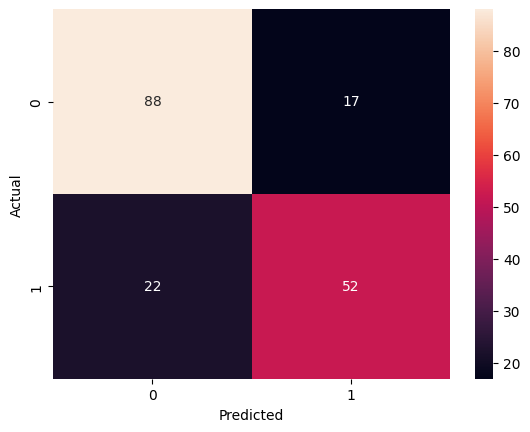

In [48]:
# using seaborn
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')